In [ ]:
!pip install -q insightface
!pip install -q onnxruntime

In [89]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

inference:

In [ ]:
app = FaceAnalysis(name="buffalo_s", providers=['CUDAExecutionProvider']) 

app.prepare(ctx_id=0, det_size=(640, 640)) 

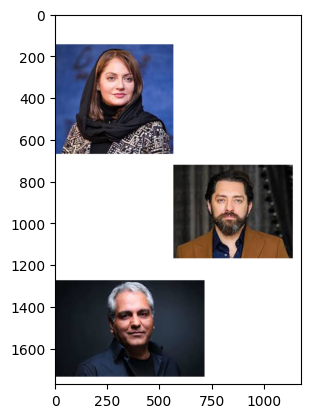

In [117]:
input_image = cv2.imread("/content/3_person.jpg")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
plt.show()


In [118]:
results = app.get(input_image)


In [97]:
face_bank = np.load("/content/face_bank.npy", allow_pickle=True)  

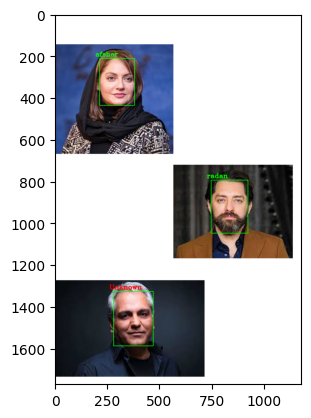

In [119]:
threshold = 25

for result in results:  
  cv2.rectangle(input_image, (int(result.bbox[0]), int(result.bbox[1])), (int(result.bbox[2]), int(result.bbox[3])), (0, 255, 0), 2)

  for person in face_bank:
    face_bank_person_embedding = person["embedding"]
    new_person_embedding = result["embedding"]

    distance = np.sqrt(np.sum((face_bank_person_embedding - new_person_embedding)**2))
    if distance < threshold:
      cv2.putText(input_image, person["name"], (int(result.bbox[0]) - 20, int(result.bbox[1]) - 10),
                  cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
      break

  else:
       cv2.putText(input_image, "Unknown", (int(result.bbox[0]) - 20, int(result.bbox[1]) - 10),
                  cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(input_image)